In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import pickle

import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csr_matrix

In [2]:
np.random.seed(1)

In [41]:
styles= pd.read_csv('all_data2.csv')

In [48]:
styles.head()

,Unnamed: 0,Unnamed: 0.1,brewery_name,review_time,beer_style,beer_name,beer_abv,main_style,cluster,avg_review_overall_p_style_p_group,...,review_palate_per_beer_full,review_taste_per_beer_full,review_aroma_per_beer_full,full_total_beers,review_overall_per_group_full,review_appearance_per_group_full,review_palate_per_group_full,review_taste_per_group_full,review_aroma_per_group_full,full_total_groups
0,0,0,Dogfish Head Brewery,1266775164,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.95,...,4.181763,4.325988,4.213526,3290,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0
1,1,1,Dogfish Head Brewery,1296628385,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,20.0,4.02,...,4.181763,4.325988,4.213526,3290,3.917230,3.934148,3.853381,3.925967,3.860718,74622.0
2,2,2,Dogfish Head Brewery,1250389086,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.95,...,4.181763,4.325988,4.213526,3290,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0
3,3,3,Dogfish Head Brewery,1230224468,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,2.0,4.30,...,4.181763,4.325988,4.213526,3290,4.138261,4.084680,4.001077,4.152127,4.062332,3714.0
4,4,4,Dogfish Head Brewery,1229312994,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.95,...,4.181763,4.325988,4.213526,3290,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0


In [45]:
len(styles_specialty.beer_name.unique())

731

In [44]:
len(styles)

1416278

In [42]:
styles_specialty = styles.loc[styles['main_style'] == 'Specialty Beers']

In [43]:
len(styles_specialty)

83381

In [47]:
styles_specialty.head()

,Unnamed: 0,Unnamed: 0.1,brewery_name,review_time,beer_style,beer_name,beer_abv,main_style,cluster,avg_review_overall_p_style_p_group,...,review_palate_per_beer_full,review_taste_per_beer_full,review_aroma_per_beer_full,full_total_beers,review_overall_per_group_full,review_appearance_per_group_full,review_palate_per_group_full,review_taste_per_group_full,review_aroma_per_group_full,full_total_groups
49193,49193,49193,West Virginia Brewing Company,1198375339,Herbed / Spiced Beer,Christmas Ale,NaN,Specialty Beers,1.0,3.59,...,3.781093,3.859454,3.780014,1391,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0
49194,49194,49194,West Virginia Brewing Company,1104578458,Herbed / Spiced Beer,Christmas Ale,NaN,Specialty Beers,1.0,3.59,...,3.781093,3.859454,3.780014,1391,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0
49195,49195,49195,Bristol Brewing Company,1325379457,Herbed / Spiced Beer,Christmas Ale,5.61,Specialty Beers,6.0,3.80,...,3.781093,3.859454,3.780014,1391,3.934254,3.953001,3.853973,3.970072,3.882525,11628.0
49196,49196,49196,Bristol Brewing Company,1324081439,Herbed / Spiced Beer,Christmas Ale,5.61,Specialty Beers,27.0,3.52,...,3.781093,3.859454,3.780014,1391,3.824301,3.826489,3.726663,3.802359,3.700263,68088.0
49197,49197,49197,Bristol Brewing Company,1324019032,Herbed / Spiced Beer,Christmas Ale,5.61,Specialty Beers,1.0,3.59,...,3.781093,3.859454,3.780014,1391,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0


In [32]:
styles.head(40)

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,main_style
3290,3290,395,Bluegrass Brewing Co. - East St. Matthew's,1210451652,3.0,4.0,4.0,jkrich,American IPA,3.0,3.0,India Pale Ale,NaN,42583,India Pale Ales
3291,3291,1289,The Ship Inn,1086927453,4.0,4.0,4.0,Billolick,English India Pale Ale (IPA),4.5,4.5,India Pale Ale,5.1,17737,India Pale Ales
3292,3292,1289,The Ship Inn,1085963165,4.5,4.0,4.5,NeroFiddled,English India Pale Ale (IPA),4.5,4.5,India Pale Ale,5.1,17737,India Pale Ales
3293,3293,5321,McMenamins Queen Anne Hill,1088738915,4.5,4.5,4.0,Globetrotter,American IPA,4.0,4.5,India Pale Ale,NaN,18451,India Pale Ales
3294,3294,2810,Streets Of New York / Uptown Brewery,1120963260,3.5,3.5,4.0,Gueuzedude,American IPA,3.5,3.5,India Pale Ale,6.2,11641,India Pale Ales
3295,3295,1930,Alcatraz Brewing Co.,1219326748,3.5,3.0,3.0,thekevlarkid,American IPA,4.5,3.0,India Pale Ale,NaN,44466,India Pale Ales
3296,3296,1930,Alcatraz Brewing Co.,1146115140,4.0,4.0,4.0,SwillinBrew,American IPA,4.0,4.0,India Pale Ale,NaN,44466,India Pale Ales
3297,3297,3717,Micro-Brasserie L'Alchimiste,1322607448,4.5,4.0,4.5,greenengineer,English India Pale Ale (IPA),4.0,4.5,India Pale Ale,5.5,36312,India Pale Ales
3298,3298,3717,Micro-Brasserie L'Alchimiste,1315861185,4.0,4.0,3.5,chefelf,English India Pale Ale (IPA),4.0,3.5,India Pale Ale,5.5,36312,India Pale Ales
3299,3299,3717,Micro-Brasserie L'Alchimiste,1313089671,3.5,3.0,3.5,ctgui,English India Pale Ale (IPA),3.5,3.5,India Pale Ale,5.5,36312,India Pale Ales


In [8]:
len(styles)

1412988

In [9]:
len(new)

TypeError: object of type 'NoneType' has no len()

In [40]:
len(styles.loc[styles['beer_name'] != "India Pale Ale"])

1409858

In [38]:
len(new)

1412988

In [19]:
new3 = styles.drop(index, inplace=True)

KeyError: "['Unnamed: 0' 'brewery_id' 'brewery_name' 'review_time' 'review_overall'\n 'review_aroma' 'review_appearance' 'review_profilename' 'beer_style'\n 'review_palate' 'review_taste' 'beer_name' 'beer_abv' 'beer_beerid'\n 'main_style'] not found in axis"

In [16]:
new3 = pd.DataFrame(new3)

In [17]:
new3.head()

""


In [4]:
styles[['beer_name', 'beer_style']].head()

,beer_name,beer_style
0,90 Minute IPA,American Double / Imperial IPA
1,90 Minute IPA,American Double / Imperial IPA
2,90 Minute IPA,American Double / Imperial IPA
3,90 Minute IPA,American Double / Imperial IPA
4,90 Minute IPA,American Double / Imperial IPA


In [6]:
user_group = styles.groupby(['review_profilename', 'main_style'])

In [7]:
len(user_group.main_style.unique())

150465

In [8]:
style_pivot = pd.pivot_table(user_group.mean(), index=['review_profilename'], columns=['main_style'], values = 'review_overall')

In [9]:
style_pivot.head()

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
review_profilename,,,,,,,,,,,,,,
0110x011,4.0,4.5,4.75,NaN,4.0,4.33871,4.208333,4.0,4.2,4.5,3.921053,4.145833,4.5,4.431818
01Ryan10,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02maxima,NaN,NaN,NaN,NaN,NaN,4.50000,NaN,3.0,NaN,NaN,4.500000,4.000000,NaN,NaN
03SVTCobra,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,3.50000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
style_pivot.shape

(32140, 14)

In [8]:
sparse_array = csr_matrix(pd.SparseDataFrame(style_pivot).to_coo())

In [11]:
# Define function to calculate the clustering errors
def clustering_errors(k, data):
    model = KMeans(n_clusters=k).fit(data)
    predictions = model.predict(data)
   #cluster_centers = kmeans.cluster_centers_
   # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
   # return sum(errors)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

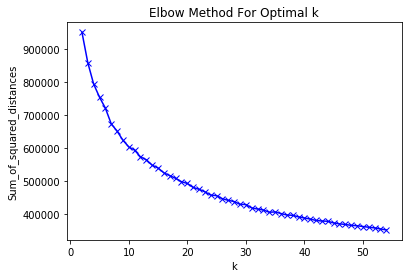

In [9]:
Sum_of_squared_distances = []
K = range(2,55)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sparse_array)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
possible_k_values = range(2, 55)

# Calculate error values for all k values we're interested in
# errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]
errors_per_k = [clustering_errors(k, sparse_array) for k in possible_k_values]

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .02)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

In [ ]:
set.seed(2)
k = 30
model = KMeans(n_clusters=k).fit(sparse_array)
predictions = model.predict(sparse_array)

In [ ]:
pd.DataFrame(predictions)

In [ ]:
import joblib
filename = 'style_model.sav'
joblib.dump(model, filename)

In [ ]:
pd.DataFrame(predictions).to_csv('style_10k_predictions.csv')

In [16]:
test = style_pivot.iloc[0:1]
test

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
review_profilename,,,,,,,,,,,,,,
0110x011,4.0,4.5,4.75,NaN,4.0,4.33871,4.208333,4.0,4.2,4.5,3.921053,4.145833,4.5,4.431818


In [17]:
for style in list(test):
    test[style] = test['Dark Lagers']

C:\Users\lizma\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
test.isnull()

In [ ]:
test1 = test.copy()
test1['Pilseners and Pale Lagers'] = 5
test1['Wheat Beers'] = 4.5
test1['Brown Ales'] = 4

test2 = test.copy()
test2['Dark Ales'] = 4
test2['Bocks'] = 4.5
test2['India Pale Ales'] = 5

test3 = test.copy()
test3['Dark Ales'] = 5
test3['Wheat Beers'] = 4.5
test3['India Pale Ales'] = 4

test4 = test.copy()
test4['Dark Lagers'] = 5
test4['Specialty Beers'] = 4.5
test4['Wild/Sour Beers'] = 4

test4

In [20]:
test4.isnull()

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
review_profilename,,,,,,,,,,,,,,
0110x011,True,True,True,False,True,True,True,True,True,False,True,True,True,False


In [21]:
pd.DataFrame(test1.iloc[0]).transpose()
pd.DataFrame(test2.iloc[0]).transpose()
pd.DataFrame(test3.iloc[0]).transpose()
pd.DataFrame(test4.iloc[0]).transpose()
# test.iloc[0]

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
0110x011,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,4.0


In [22]:
test_sparse_array1 = csr_matrix(pd.SparseDataFrame(pd.DataFrame(test1.iloc[0]).transpose()).to_coo())

In [23]:
test_sparse_array2 = csr_matrix(pd.SparseDataFrame(pd.DataFrame(test2.iloc[0]).transpose()).to_coo())

In [24]:
test_sparse_array3 = csr_matrix(pd.SparseDataFrame(pd.DataFrame(test3.iloc[0]).transpose()).to_coo())

In [25]:
test_sparse_array4 = csr_matrix(pd.SparseDataFrame(pd.DataFrame(test4.iloc[0]).transpose()).to_coo())

In [36]:
test.to_csv('bare_df_styles.csv')

In [26]:
model.predict(test_sparse_array1)

array([12])

In [27]:
model.predict(test_sparse_array2)

array([2])

In [28]:
model.predict(test_sparse_array3)

array([21])

In [29]:
model.predict(test_sparse_array4)

array([17])

In [30]:
sparse_array.shape

(32140, 14)

For n_clusters = 30 The average silhouette_score is : 0.2978181417197682


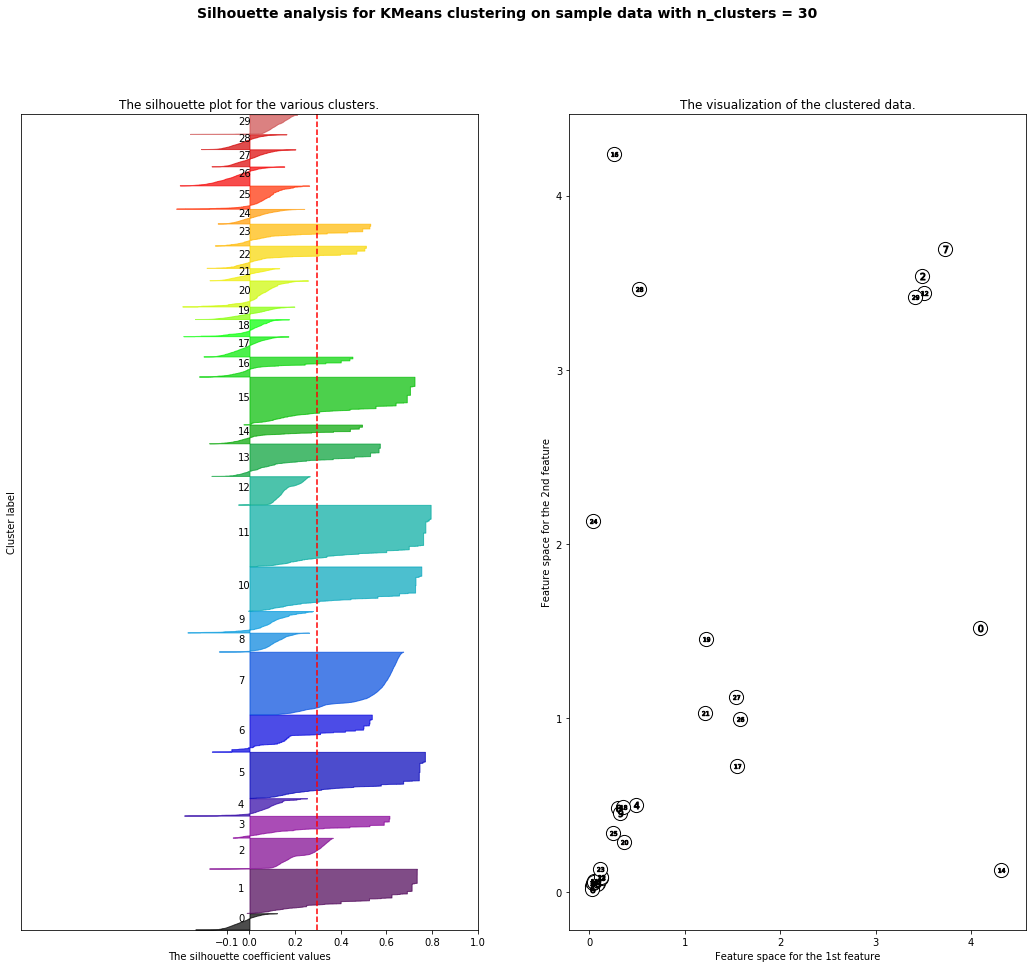

In [35]:
plotSilhouette(30, sparse_array)

For n_clusters = 30 The average silhouette_score is : 0.2978181417197682


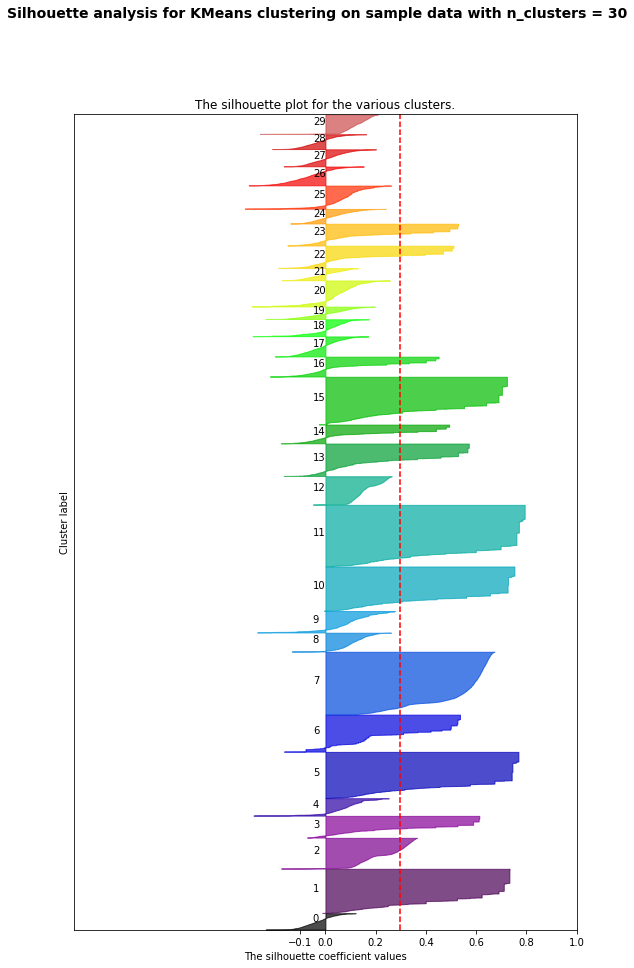

In [37]:
plotSilhouetteOnly(30, sparse_array)

In [32]:
def plotSilhouette(n_clusters, X):

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 15)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, 32140 + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
#     ax2.scatter(X[:, 0], X[:, 5], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [33]:
def plotSilhouetteOnly(n_clusters, X):

    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(9, 15)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, 32140 + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [39]:
def draw_beers_heatmap(most_rated_beer_users_selection, axis_labels=True):
    
    fig = plt.figure(figsize=(7,15))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_beer_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
            ax.set_yticks(np.arange(most_rated_beer_users_selection.shape[0]) , minor=False)
            ax.set_xticks(np.arange(most_rated_beer_users_selection.shape[1]) , minor=False)
            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = most_rated_beer_users_selection.columns.str[:40]
            ax.set_xticklabels(labels, minor=False)
            ax.set_yticklabels(most_rated_beer_users_selection.index, minor=False)
            plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    ax.grid(False)
    ax.set_ylabel('User id')
    
    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
    plt.show()

In [114]:
sparse_array

<32140x14 sparse matrix of type '<class 'numpy.float64'>'
	with 150465 stored elements in Compressed Sparse Row format>

In [38]:
def get_most_rated_beers(user_beer_ratings, max_number_of_beers):
    # 1- Count
    user_beer_ratings = user_beer_ratings.append(user_beer_ratings.count(), ignore_index=True)
    # 2- sort
    user_beer_ratings_sorted = user_beer_ratings.sort_values(len(user_beer_ratings)-1, axis=1, ascending=False)
    user_beer_ratings_sorted = user_beer_ratings_sorted.drop(user_beer_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_beers = user_beer_ratings_sorted.iloc[:, :max_number_of_beers]
    return most_rated_beers


def get_most_rated_users(user_beer_ratings, max_number_of_users):
    # 1- Count
    user_beer_ratings = user_beer_ratings.append(user_beer_ratings.count(), ignore_index=True)
    # 2- sort
    user_beer_ratings_sorted = user_beer_ratings.sort_values(len(user_beer_ratings)-1, axis=1, ascending=False)
    user_beer_ratings_sorted = user_beer_ratings_sorted.drop(user_beer_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_beers = user_beer_ratings_sorted.iloc[:max_number_of_users, :]
    return most_rated_beers


# Define the sorting by rating function
def sort_by_rating_density(user_beer_ratings, n_beers, n_users):
    most_rated_beers = get_most_rated_beers(user_beer_ratings, n_beers)
    most_rated_beers = get_most_rated_beers(most_rated_beers, n_users)
    return most_rated_beers

In [143]:
hm_df = get_most_rated_beers(style_pivot, len(list(style_pivot)))

In [144]:
hm_df = get_most_rated_users(hm_df, 500)

In [145]:
hm_df = sort_by_rating_density(hm_df, len(list(hm_df)), 500)

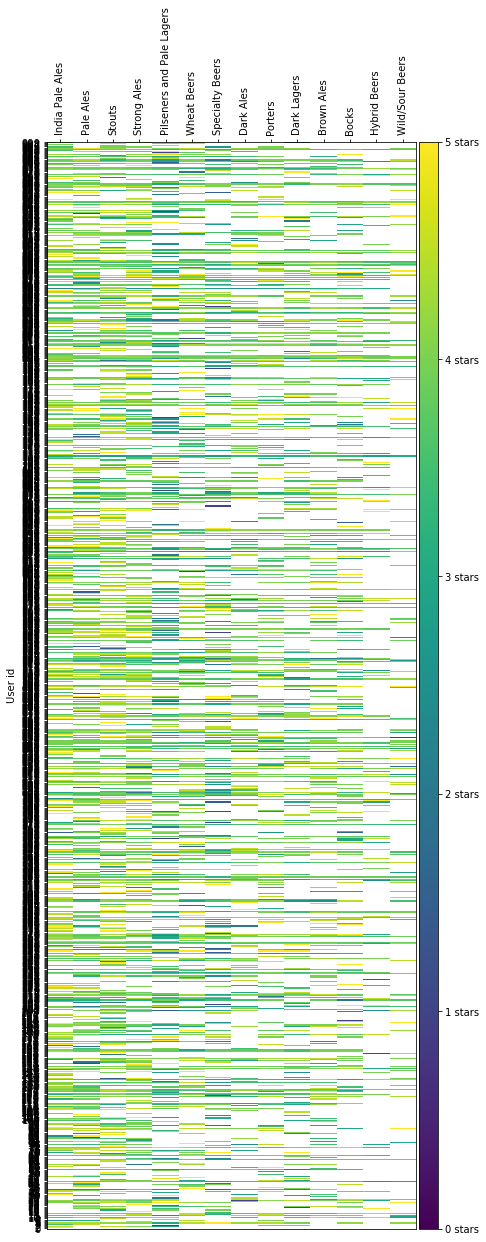

In [141]:
draw_beers_heatmap(hm_df) # 1000 users

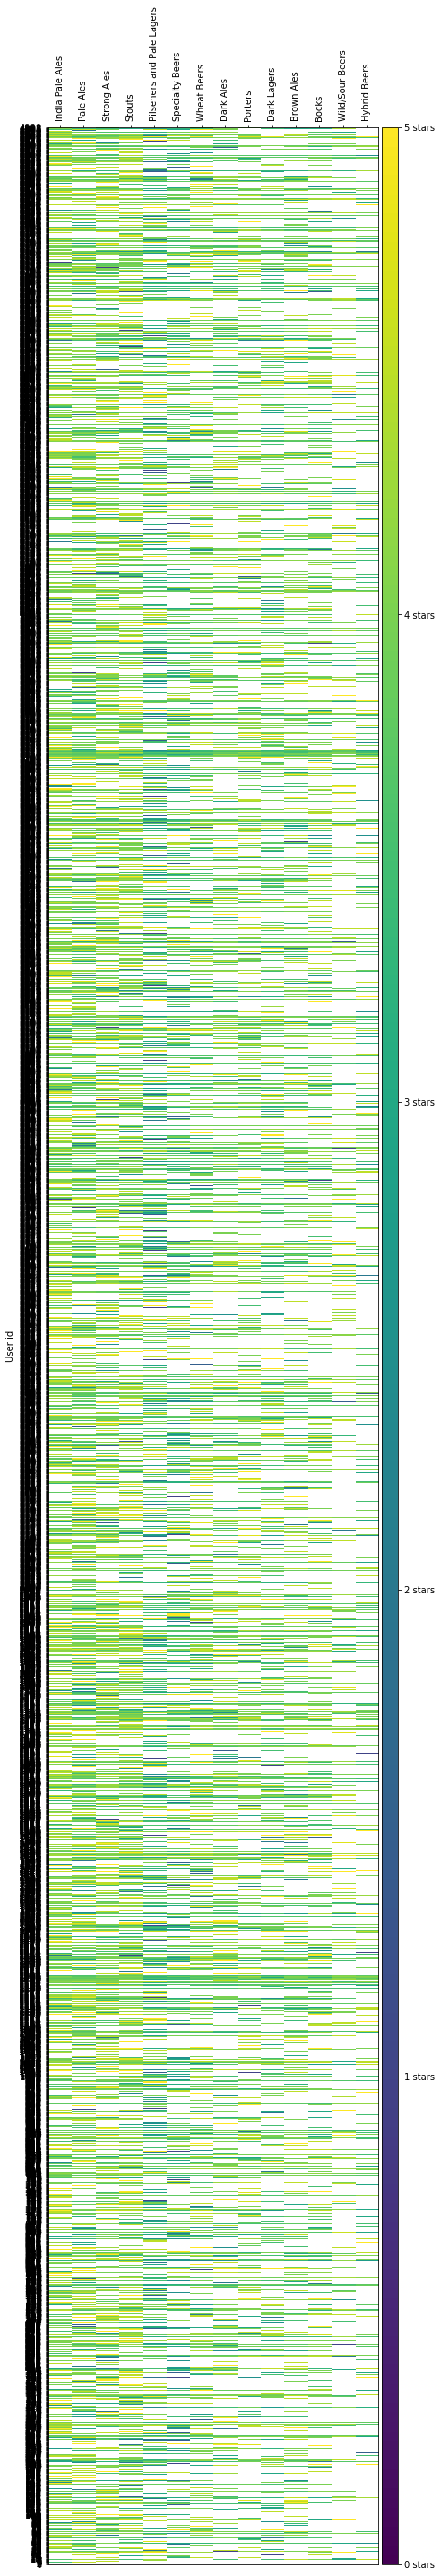

In [146]:
draw_beers_heatmap(hm_df)

In [40]:
styles.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,main_style
0,0,10099,Dogfish Head Brewery,1266775164,4.0,4.5,4.5,DmanGTR,American Double / Imperial IPA,4.5,4.5,90 Minute IPA,9.0,2093,India Pale Ales
1,1,10099,Dogfish Head Brewery,1296628385,4.0,4.0,4.0,nickadams2,American Double / Imperial IPA,3.5,4.0,90 Minute IPA,9.0,2093,India Pale Ales
2,2,10099,Dogfish Head Brewery,1250389086,4.0,4.0,4.0,kegger22,American Double / Imperial IPA,4.0,4.5,90 Minute IPA,9.0,2093,India Pale Ales
3,3,10099,Dogfish Head Brewery,1230224468,5.0,5.0,5.0,fairway31533,American Double / Imperial IPA,5.0,5.0,90 Minute IPA,9.0,2093,India Pale Ales
4,4,10099,Dogfish Head Brewery,1229312994,4.0,4.5,4.0,Bung,American Double / Imperial IPA,4.0,4.0,90 Minute IPA,9.0,2093,India Pale Ales


In [44]:
predict_df = pd.DataFrame({'review_profilename':style_pivot.index , 'cluster':predictions})
predict_df = predict_df.set_index('review_profilename')
predict_df.head()

,cluster
review_profilename,
0110x011,1
01Ryan10,2
02maxima,23
03SVTCobra,17
04101Brewer,29


In [45]:
main_df = styles.merge(predict_df, how='left', on='review_profilename')

In [46]:
style_groups = main_df.groupby('main_style')
beer_groups = main_df.groupby('beer_name')
cluster_groups = main_df.groupby('cluster')

In [52]:
style_averages_df = style_groups.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

In [53]:
beer_averages_df = beer_groups.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

In [55]:
cluster_groups.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

,review_overall,review_appearance,review_palate,review_taste,review_aroma
cluster,,,,,
0.0,3.907378,3.900773,3.800419,3.931862,3.845844
1.0,3.823212,3.860898,3.763137,3.800165,3.759356
2.0,4.138261,4.084680,4.001077,4.152127,4.062332
3.0,3.792686,3.759713,3.675811,3.755854,3.624987
4.0,4.075587,4.079226,3.997850,4.112306,3.992557
5.0,2.201112,3.246525,2.623726,2.296108,2.723818
6.0,3.934254,3.953001,3.853973,3.970072,3.882525
7.0,3.759703,3.451401,3.399426,3.507256,3.212960
8.0,3.770255,3.760628,3.670864,3.741401,3.634894


In [1]:
#import dependencies
import sqlalchemy
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import MySQLdb
import mysql.connector
import sqlite3

In [9]:
#connect to the database
database_path = "dbfinal.sqlite3"
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [4]:
# database_path = "data.db"
# engine = create_engine(f"sqlite:///{database_path}")
# conn = engine.connect()

In [5]:
engine.table_names()

['clusters', 'top_beers']

In [5]:
engine.table_names()

[]

In [6]:
all_cluster_style = pd.read_csv('all_cluster_style.csv')

In [8]:
#all_data2 = pd.read_csv('all_data2.csv')

In [7]:
topBeersClusters = pd.read_csv('topBeers.csv')

In [10]:
all_cluster_style.head()

,Unnamed: 0,main_style,brewery_name,beer_style,beer_name,beer_abv,cluster,avg_review_overall_p_style_p_group,avg_review_aroma_p_style_p_group,avg_review_appearance_p_style_p_group,...,avg_review_taste_p_beer_p_style_p_group,total_reviews_per_beer_per_style_by_cluster,full_total_styles,full_total_beers,review_overall_per_group_full,review_appearance_per_group_full,review_palate_per_group_full,review_taste_per_group_full,review_aroma_per_group_full,full_total_groups
0,0,Bocks,Innstadt Brauerei,Bock,D' Inn'Staade,5.6,0.0,4.00,3.91,3.93,...,4.00,1.0,50610,18,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
1,1,Brown Ales,COAST Brewing Company,Altbier,ALTerior Motive,6.3,0.0,3.88,3.74,3.79,...,4.00,1.0,48899,16,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
2,2,Dark Ales,Brouwerij Haacht NV,Belgian Dark Ale,Tongerlo 6 Dubbel Bruin,6.0,0.0,3.77,3.70,3.89,...,3.75,2.0,60821,23,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
3,3,Dark Lagers,Mildura Theatre Brewery Pty Ltd,American Amber / Red Lager,Mallee Bull Heavy,5.6,0.0,3.91,3.59,3.74,...,2.00,1.0,60925,16,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
4,4,Hybrid Beers,Mountain Goat Beer Pty Ltd,California Common / Steam Beer,Mountain Goat Steam Ale,5.1,0.0,3.98,3.88,3.92,...,3.50,1.0,15775,21,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0


In [11]:
all_data2.head()

,Unnamed: 0,Unnamed: 0.1,brewery_name,review_time,beer_style,beer_name,beer_abv,main_style,cluster,avg_review_overall_p_style_p_group,...,review_palate_per_beer_full,review_taste_per_beer_full,review_aroma_per_beer_full,full_total_beers,review_overall_per_group_full,review_appearance_per_group_full,review_palate_per_group_full,review_taste_per_group_full,review_aroma_per_group_full,full_total_groups
0,0,0,Dogfish Head Brewery,1266775164,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.95,...,4.181763,4.325988,4.213526,3290,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0
1,1,1,Dogfish Head Brewery,1296628385,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,20.0,4.02,...,4.181763,4.325988,4.213526,3290,3.917230,3.934148,3.853381,3.925967,3.860718,74622.0
2,2,2,Dogfish Head Brewery,1250389086,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.95,...,4.181763,4.325988,4.213526,3290,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0
3,3,3,Dogfish Head Brewery,1230224468,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,2.0,4.30,...,4.181763,4.325988,4.213526,3290,4.138261,4.084680,4.001077,4.152127,4.062332,3714.0
4,4,4,Dogfish Head Brewery,1229312994,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.95,...,4.181763,4.325988,4.213526,3290,3.823212,3.860898,3.763137,3.800165,3.759356,976821.0


In [12]:
topBeersClusters.head()

,Unnamed: 0,beer_name,brewery_name,beer_style,beer_abv,main_style,cluster,avg_review_overall_p_style_p_group,avg_review_aroma_p_style_p_group,avg_review_appearance_p_style_p_group,...,avg_review_taste_p_beer_p_style_p_group,total_reviews_per_beer_per_style_by_cluster,full_total_styles,full_total_beers,review_overall_per_group_full,review_appearance_per_group_full,review_palate_per_group_full,review_taste_per_group_full,review_aroma_per_group_full,full_total_groups
0,0,Cantillon Blåbær Lambik,Brasserie Cantillon,Lambic - Fruit,5.0,Specialty Beers,0.0,3.91,3.90,3.81,...,5.0,2.0,83381,156,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
1,1,Darkness,Surly Brewing Company,Russian Imperial Stout,10.3,Stouts,0.0,3.90,4.03,4.13,...,5.0,2.0,166797,649,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
2,2,Rumpkin,Avery Brewing Company,Pumpkin Ale,15.9,Specialty Beers,0.0,3.91,3.90,3.81,...,5.0,2.0,83381,94,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
3,3,2XIPA,Southern Tier Brewing Company,American Double / Imperial IPA,8.2,India Pale Ales,0.0,3.75,3.92,3.99,...,5.0,1.0,210717,712,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
4,4,668 The Neighbor Of The Beast,New England Brewing Co.,Belgian Strong Pale Ale,9.0,Strong Ales,0.0,4.09,4.05,4.09,...,5.0,1.0,207116,113,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0


In [10]:
all_cluster_style.to_sql(name='clusters', con=engine, if_exists='replace', index=False)
#check it worked
engine.table_names()

['clusters']

In [29]:
all_data2.to_sql(name='all_data2', con=engine, if_exists='replace', index=False)
#check it worked
engine.table_names()

['all_cluster_style', 'all_data2']

In [12]:
topBeersClusters.to_sql(name='top_beers', con=engine, if_exists='replace', index=False)
#check it worked
engine.table_names()

['clusters', 'top_beers']

In [25]:
query_string = "SELECT * FROM topBeersClusters LIMIT 5;"
results = pd.read_sql_query(query_string, con=engine)
results

,Unnamed: 0,beer_name,brewery_name,beer_style,beer_abv,main_style,cluster,avg_review_overall_p_style_p_group,avg_review_aroma_p_style_p_group,avg_review_appearance_p_style_p_group,...,avg_review_taste_p_beer_p_style_p_group,total_reviews_per_beer_per_style_by_cluster,full_total_styles,full_total_beers,review_overall_per_group_full,review_appearance_per_group_full,review_palate_per_group_full,review_taste_per_group_full,review_aroma_per_group_full,full_total_groups
0,0,Cantillon Blåbær Lambik,Brasserie Cantillon,Lambic - Fruit,5.0,Specialty Beers,0.0,3.91,3.90,3.81,...,5.0,2.0,83381,156,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
1,1,Darkness,Surly Brewing Company,Russian Imperial Stout,10.3,Stouts,0.0,3.90,4.03,4.13,...,5.0,2.0,166797,649,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
2,2,Rumpkin,Avery Brewing Company,Pumpkin Ale,15.9,Specialty Beers,0.0,3.91,3.90,3.81,...,5.0,2.0,83381,94,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
3,3,2XIPA,Southern Tier Brewing Company,American Double / Imperial IPA,8.2,India Pale Ales,0.0,3.75,3.92,3.99,...,5.0,1.0,210717,712,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0
4,4,668 The Neighbor Of The Beast,New England Brewing Co.,Belgian Strong Pale Ale,9.0,Strong Ales,0.0,4.09,4.05,4.09,...,5.0,1.0,207116,113,3.907378,3.900773,3.800419,3.931862,3.845844,3104.0


In [3]:
db = pd.read_csv('all_data.csv')

In [7]:
results.beer_name.unique()

array(['90 Minute IPA', 'India Pale Ale', 'Sierra Nevada Celebration Ale',
       ..., 'Ichabod Ale 2007', 'Provisions Series: Gunga Galunga',
       'Quinquepartite'], dtype=object)

In [6]:
#db.to_sql(name='all_data', con=engine, if_exists='replace', index=False)
#check it worked
engine.table_names()

[]

In [25]:
results = pd.DataFrame(results)
results.head(10)

,Unnamed: 0,brewery_name,review_time,beer_style,beer_name,beer_abv,main_style,cluster,avg_style_review_overall,avg_style_review_appearance,...,avg_beer_review_aroma,total_beer_reviews,avg_group_review_overall,avg_group_review_appearance,avg_group_review_palate,avg_group_review_taste,avg_group_review_aroma,total_cluster_reviews,total_per_style_cluster,total_per_beer_cluster
0,0,Dogfish Head Brewery,1266775164,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.97,4.01,...,4.21,3290,3.82,3.86,3.76,3.80,3.76,976821.0,139663.0,1541.0
1,1,Dogfish Head Brewery,1296628385,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,20.0,3.97,4.01,...,4.21,3290,3.92,3.93,3.85,3.93,3.86,74622.0,13634.0,250.0
2,2,Dogfish Head Brewery,1250389086,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.97,4.01,...,4.21,3290,3.82,3.86,3.76,3.80,3.76,976821.0,139663.0,1541.0
3,3,Dogfish Head Brewery,1230224468,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,2.0,3.97,4.01,...,4.21,3290,4.14,4.08,4.00,4.15,4.06,3714.0,3037.0,97.0
4,4,Dogfish Head Brewery,1229312994,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.97,4.01,...,4.21,3290,3.82,3.86,3.76,3.80,3.76,976821.0,139663.0,1541.0


In [18]:
results = results.to_dict()

AttributeError: 'dict' object has no attribute 'to_dict'

In [17]:
import json
json_results = results.to_json(orient='columns')
json_results

AttributeError: 'dict' object has no attribute 'to_json'

In [34]:
db.head()

,Unnamed: 0,brewery_name,review_time,beer_style,beer_name,beer_abv,main_style,cluster,avg_style_review_overall,avg_style_review_appearance,...,avg_beer_review_aroma,total_beer_reviews,avg_group_review_overall,avg_group_review_appearance,avg_group_review_palate,avg_group_review_taste,avg_group_review_aroma,total_cluster_reviews,total_per_style_cluster,total_per_beer_cluster
0,0,Dogfish Head Brewery,1266775164,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.97,4.01,...,4.21,3290,3.82,3.86,3.76,3.80,3.76,976821.0,139663.0,1541.0
1,1,Dogfish Head Brewery,1296628385,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,20.0,3.97,4.01,...,4.21,3290,3.92,3.93,3.85,3.93,3.86,74622.0,13634.0,250.0
2,2,Dogfish Head Brewery,1250389086,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.97,4.01,...,4.21,3290,3.82,3.86,3.76,3.80,3.76,976821.0,139663.0,1541.0
3,3,Dogfish Head Brewery,1230224468,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,2.0,3.97,4.01,...,4.21,3290,4.14,4.08,4.00,4.15,4.06,3714.0,3037.0,97.0
4,4,Dogfish Head Brewery,1229312994,American Double / Imperial IPA,90 Minute IPA,9.0,India Pale Ales,1.0,3.97,4.01,...,4.21,3290,3.82,3.86,3.76,3.80,3.76,976821.0,139663.0,1541.0


In [39]:
# Get a list of column names and types
#Double check it worked
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('all_data')
for c in columns:
    print(c['name'], c["type"])
# columns

Unnamed: 0 BIGINT
brewery_name TEXT
review_time BIGINT
beer_style TEXT
beer_name TEXT
beer_abv FLOAT
main_style TEXT
cluster FLOAT
avg_style_review_overall FLOAT
avg_style_review_appearance FLOAT
avg_style_review_palate FLOAT
avg_style_review_taste FLOAT
avg_style_review_aroma FLOAT
total_style_reviews BIGINT
avg_beer_review_overall FLOAT
avg_beer_review_appearance FLOAT
avg_beer_review_palate FLOAT
avg_beer_review_taste FLOAT
avg_beer_review_aroma FLOAT
total_beer_reviews BIGINT
avg_group_review_overall FLOAT
avg_group_review_appearance FLOAT
avg_group_review_palate FLOAT
avg_group_review_taste FLOAT
avg_group_review_aroma FLOAT
total_cluster_reviews FLOAT
total_per_style_cluster FLOAT
total_per_beer_cluster FLOAT
